In [1]:
import numpy as np
import pandas as pd
import itertools as it
import os
import math
import matplotlib.pyplot as plt
import random

In [2]:
# variables
closepairs = [['C', 'T'], ['A', 'T'], ['A', 'G']]

In [3]:
def make_dict(S):
    d = { }
    for s in S:
        if not s in d:
            d[s] = 0
    return d

In [4]:
# Define character sets
othchars = {'N', '\n'} # Expected characters that should be ignored
nucchars = {'T', 'A', 'C', 'G'} # Characters that should be read as part of the RNA # , 'B', 'K', 'M', 'S', 'R', 'W', 'Y'
corenucchars = ['T', 'A', 'C', 'G'] # Subset of characters of RNA that are valid
cdnchars = [] # All triplets of nucchars
for c in it.product(nucchars, repeat=3):
    codon = c[0]+c[1]+c[2]
    cdnchars.append(codon)
corecdnchars = [] # All triplets of corenucchars
for c in it.product(corenucchars, repeat=3):
    codon = c[0]+c[1]+c[2]
    corecdnchars.append(codon)

In [5]:
# Codon dictionary
codondict = {
    "TTT": "Phenyl-alanine",
    "TTC": "Phenyl-alanine",
    "TTA": "Leucine",
    "TTG": "Leucine",
    "TCT": "Serine",
    "TCC": "Serine",
    "TCA": "Serine",
    "TCG": "Serine",
    "TAT": "Tyrosine",
    "TAC": "Tyrosine",
    "TAA": "Stop",
    "TAG": "Stop",
    "TGT": "Cysteine",
    "TGC": "Cysteine",
    "TGA": "Stop",
    "TGG": "Tryptophan",
    "CTT": "Leucine",
    "CTC": "Leucine",
    "CTA": "Leucine",
    "CTG": "Leucine",
    "CCT": "Proline",
    "CCC": "Proline",
    "CCA": "Proline",
    "CCG": "Proline",
    "CAT": "Histidine",
    "CAC": "Histidine",
    "CAA": "Glutamine",
    "CAG": "Glutamine",
    "CGT": "Arginine",
    "CGC": "Arginine",
    "CGA": "Arginine",
    "CGG": "Arginine",
    "ATT": "Isoleucine",
    "ATC": "Isoleucine",
    "ATA": "Isoleucine",
    "ATG": "Methionine",
    "ACT": "Threonine",
    "ACC": "Threonine",
    "ACA": "Threonine",
    "ACG": "Threonine",
    "AAT": "Asparagine",
    "AAC": "Asparagine",
    "AAA": "Lysine",
    "AAG": "Lysine",
    "AGT": "Serine",
    "AGC": "Serine",
    "AGA": "Arginine",
    "AGG": "Arginine",
    "GTT": "Valine",
    "GTC": "Valine",
    "GTA": "Valine",
    "GTG": "Valine",
    "GCT": "Alanine",
    "GCC": "Alanine",
    "GCA": "Alanine",
    "GCG": "Alanine",
    "GAT": "Aspartic Acid",
    "GAC": "Aspartic Acid",
    "GAA": "Glutamic Acid",
    "GAG": "Glutamic Acid",
    "GGT": "Glycine",
    "GGC": "Glycine",
    "GGA": "Glycine",
    "GGG": "Glycine",
}
aminonames = []
for c in corecdnchars:
    if not codondict[c] in aminonames:
        aminonames.append(codondict[c])

rev_codondict = make_dict(aminonames) # dictionary from amino acid to codons
for c in corecdnchars:
    if  rev_codondict[codondict[c]] == 0:
        rev_codondict[codondict[c]] = []
    rev_codondict[codondict[c]].append(c)
        
print(aminonames)
print(rev_codondict)

['Phenyl-alanine', 'Leucine', 'Tyrosine', 'Stop', 'Serine', 'Cysteine', 'Tryptophan', 'Isoleucine', 'Methionine', 'Asparagine', 'Lysine', 'Threonine', 'Arginine', 'Histidine', 'Glutamine', 'Proline', 'Valine', 'Aspartic Acid', 'Glutamic Acid', 'Alanine', 'Glycine']
{'Phenyl-alanine': ['TTT', 'TTC'], 'Leucine': ['TTA', 'TTG', 'CTT', 'CTA', 'CTC', 'CTG'], 'Tyrosine': ['TAT', 'TAC'], 'Stop': ['TAA', 'TAG', 'TGA'], 'Serine': ['TCT', 'TCA', 'TCC', 'TCG', 'AGT', 'AGC'], 'Cysteine': ['TGT', 'TGC'], 'Tryptophan': ['TGG'], 'Isoleucine': ['ATT', 'ATA', 'ATC'], 'Methionine': ['ATG'], 'Asparagine': ['AAT', 'AAC'], 'Lysine': ['AAA', 'AAG'], 'Threonine': ['ACT', 'ACA', 'ACC', 'ACG'], 'Arginine': ['AGA', 'AGG', 'CGT', 'CGA', 'CGC', 'CGG'], 'Histidine': ['CAT', 'CAC'], 'Glutamine': ['CAA', 'CAG'], 'Proline': ['CCT', 'CCA', 'CCC', 'CCG'], 'Valine': ['GTT', 'GTA', 'GTC', 'GTG'], 'Aspartic Acid': ['GAT', 'GAC'], 'Glutamic Acid': ['GAA', 'GAG'], 'Alanine': ['GCT', 'GCA', 'GCC', 'GCG'], 'Glycine': ['GGT', 

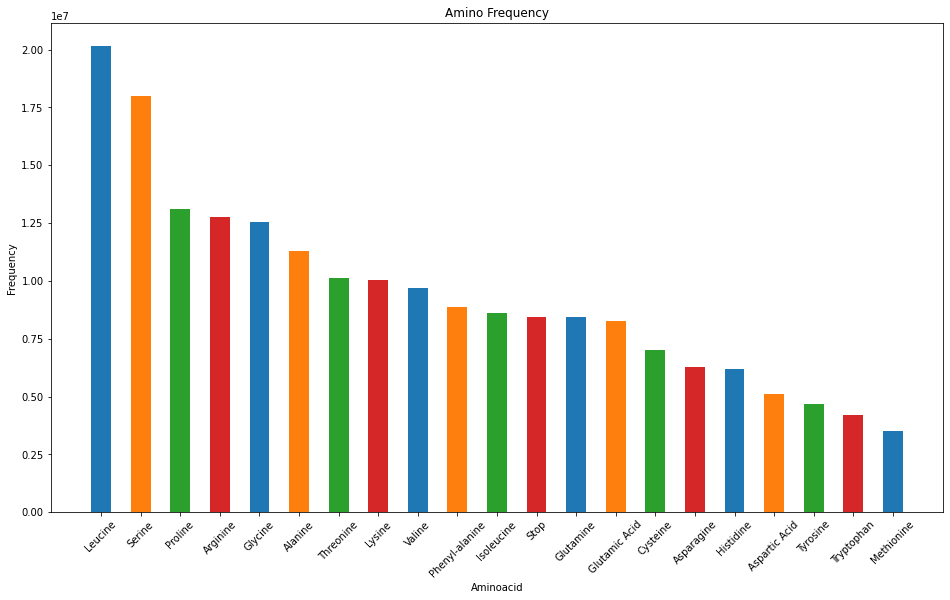

In [6]:
# load distribution of codons
distdict = {'TTT': 5379930, 'TTC': 3489330, 'TTG': 3346091, 'TTA': 2854192, 'TCT': 3713851, 'TCC': 3333211, 'TCG': 827472, 'TCA': 3560263, 'TGT': 3671777, 'TGC': 3358600, 'TGG': 4198572, 'TGA': 3896165, 'TAT': 2717421, 'TAC': 1971858, 'TAG': 1765414, 'TAA': 2772671, 'CTT': 3604102, 'CTC': 3418446, 'CTG': 4886439, 'CTA': 2028492, 'CCT': 3994829, 'CCC': 3584074, 'CCG': 1395220, 'CCA': 4126496, 'CGT': 850978, 'CGC': 1167168, 'CGG': 1393193, 'CGA': 935301, 'CAT': 3177732, 'CAC': 3021415, 'CAG': 4927410, 'CAA': 3494785, 'GTT': 2540730, 'GTC': 2064226, 'GTG': 3312170, 'GTA': 1790976, 'GCT': 3339168, 'GCC': 3427017, 'GCG': 1193087, 'GCA': 3324824, 'GGT': 2258681, 'GGC': 3176324, 'GGG': 3156393, 'GGA': 3967764, 'GAT': 2672919, 'GAC': 2444849, 'GAG': 3952791, 'GAA': 4332881, 'ATT': 3552064, 'ATC': 2458843, 'ATG': 3518926, 'ATA': 2584899, 'ACT': 2896694, 'ACC': 2744211, 'ACG': 915076, 'ACA': 3584179, 'AGT': 2959982, 'AGC': 3579694, 'AGG': 3790603, 'AGA': 4636759, 'AAT': 3574871, 'AAC': 2726839, 'AAG': 4257699, 'AAA': 5772129}

# count amino acids, and their percentage
total = 0
da = make_dict(aminonames)
dt = make_dict(aminonames)

for c in corecdnchars:
    da[codondict[c]] += distdict[c]
    total += distdict[c]
    
for c in aminonames:
    dt[c] = da[c] / total

# sort and graph
X = list(aminonames)
X.sort(reverse=True, key=lambda x : da[x])
Y = [da[x] for x in X]
    
fig, ax = plt.subplots(figsize =(16, 9))
plt.bar(X,Y,width=0.5,color=["tab:blue", "tab:orange", "tab:green", "tab:red"])
plt.title("Amino Frequency")
plt.xlabel('Aminoacid')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
plt.close()

In [7]:
# returns a codon given a number between 0 and 1
def find_codon(p):
    current = 0
    curprob = 0        
    
    while current < len(aminonames):
        curprob += dt[aminonames[current]]
        if p < curprob:
            return aminonames[current]
        current += 1
        
    return aminonames[-1]

In [8]:
# returns a string of 0's and 1's given a boolean list
def intlist_2_str(l):
    out = ""
    
    for i in l:
        out += str(i)
            
    return out

In [9]:
def errgen_01(char, err):
    if err == 0:
        return char, 0
    return random.choice([x for x in corenucchars if not x == char]), 1

def errcor_01(char, err):
    if err == 0:
        return [char]
    
    return [x for x in corenucchars if not x == char]

In [10]:
def close_char(char):
    close = set()
    for p in closepairs:
        if char in p:
            close.extend(p)
    return close

def errgen_close(char, err):
    if err == 0:
        return char, 0
    
    close = close_char(char)
    mod_char = random.choice([x for x in corenucchars if not x == char])
    
    if mod_char in close:
        return mod_char, 0
    
    return mod_char, 1
    
def errcor_close(char, err):
    close = close_char(char)
    if err == 0:
        return close
    return [x for x in corenucchars if not x in close]

In [11]:
# return whether there is an error given a number between 0 and 1
def has_error(p, p_err):
    if p < p_err:
        return 1
    return 0

In [21]:
# generates input with an RNA sequence of n codons, and accompanying error, modified RNA, and error code 
def gen_RNAerr(n, p_err, errmode):
    rna = ""
    err = []
    mod_rna = ""
    err_code = []
    
    for i in range(n):
        r = random.uniform(0, 1)
        cdn = random.choice(rev_codondict[find_codon(r)])
        rna += cdn
    
    for i in range(3*n):
        r = random.uniform(0, 1)
        cur_err = has_error(r, p_err)
        err.append(cur_err)
        
        mod_char, err_bit = errmode[0](rna[i],cur_err)
        err_code.append(err_bit)
        mod_rna += mod_char

    return rna, err, mod_rna, err_code

In [29]:
def pos_codons(c, e, errmode):
    p = [errmode[1](c[i], e[i]) for i in range(3)]
    return [x + y + z for x in p[0] for y in p[1] for z in p[2]]

In [30]:
def can_read(rna, mod_rna, err_code, errmode):
    n = len(rna)
    if not n == len(mod_rna):
        print("Invalid length")
    
    output = True
    nsucc = [0 for i in range(4)] # nsucc[i] = number of successful reads with i errors in codon
    ntot = [0 for i in range(4)] # nsucc[i] = number of codons with i errors
    
    for i in range(math.floor(n/3)):
        real_codon = rna[3*i : 3*i + 3]
        mod_codon = mod_rna[3*i : 3*i + 3]
        err_codon = err_code[3*i : 3*i + 3]
        n_err = 0
        for e in err_codon:
            if e == 1:
                n_err += 1
        ntot[n_err] += 1
        
        ident_codons = rev_codondict[codondict[real_codon]] # find all codons representing same aminoacid as real codon
        
        if mod_codon in ident_codons: # the output of the machine corresponds to the same codon
            nsucc[n_err] += 1
            continue
        
        # check if all possible codons after error correction are correct
        errcorr_codons = pos_codons(mod_codon, err_codon, errmode)
        valid = True
        for c in errcorr_codons:
            if not c in ident_codons:
                valid = False
                break
        
        if valid:
            nsucc[n_err] += 1
            continue
        
        output = False
    
    return output, nsucc, ntot

In [31]:
def do_experiment(codoncount, p_err, expcount, errmode):
    successes = 0
    succ_read = [0 for i in range(4)]
    tot_read = [0 for i in range(4)]
    
    for i in range(expcount):
        rna, errmap, mod_rna, err_code = gen_RNAerr(codoncount, p_err, errmode)
        read, succ, tot = can_read(rna, mod_rna, err_code, errmode)
        if read:
            successes += 1
        
        for i in range(4):
            succ_read[i] += succ[i]
            tot_read[i] += tot[i]
        
    return successes, succ_read, tot_read

In [39]:
do_experiment(10, 0.3, 5000, (errgen_01, errcor_01))

(1, [17315, 5077, 151, 9], [17315, 21908, 9427, 1350])

In [44]:
def do_experiments(codoncounts, p_errs, expcounts, errmode):
    out = [ [ 0 for j in p_errs ] for i in codoncounts]
    
    for i in range(len(codoncounts)):
        for j in range(len(p_errs)):
            res = do_experiment(codoncounts[i], p_errs[j], expcounts, errmode)
            out[i][j] = res
    
    return out

In [48]:
do_experiments([10,20],[0.01,0.1], 5000, (errgen_01, errcor_01))

[[(3948, [48486, 352, 0, 0], [48486, 1504, 10, 0]),
  (486, [36603, 2751, 23, 0], [36603, 12003, 1355, 39])],
 [(3123, [96983, 681, 2, 0], [96983, 2989, 28, 0]),
  (32, [72658, 5809, 41, 0], [72658, 24577, 2661, 104])]]